In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

In [0]:
spark = (SparkSession.builder.appName("SalesUnderlying").getOrCreate())

### Read 2019 Data from Parquet Files Directory

In [0]:
soure_data_path = "dbfs:/FileStore/shared_uploads/htb29021996@gmail.com/salesdata/ParquetFile/ReportedYear=2019"
sales2019_df = spark.read.parquet(soure_data_path)

In [0]:
sales2019_df.show(10, False)

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+--------------+-----+-----+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City          |State|Month|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+--------------+-----+-----+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   | New York City|NY   |12   |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      | New York City|NY   |12   |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     | New York City|NY   |12   |
|295668 |27in FHD Monitor          |1       |149.99|2019-12-22 15:13:00|410 6th St, San Francisco, CA 94016      | San Francisco|CA   |12   |
|29566

### Q1: What was the best month in Sales?

In [0]:
from pyspark.sql.functions import round, sum
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
sales_q1_df = (sales2019_df.select(
    col("OrderID"),
    col("Month"),
    col("Price"),
    col("Quantity"),
    expr("Price * Quantity").alias("Sales")
))

In [0]:
sales_q1_df.show(10, False)

+-------+-----+------+--------+------+
|OrderID|Month|Price |Quantity|Sales |
+-------+-----+------+--------+------+
|295665 |12   |1700.0|1       |1700.0|
|295666 |12   |600.0 |1       |600.0 |
|295667 |12   |11.95 |1       |11.95 |
|295668 |12   |149.99|1       |149.99|
|295669 |12   |11.95 |1       |11.95 |
|295670 |12   |3.84  |1       |3.84  |
|295671 |12   |11.95 |1       |11.95 |
|295672 |12   |11.95 |2       |23.9  |
|295673 |12   |99.99 |1       |99.99 |
|295674 |12   |2.99  |4       |11.96 |
+-------+-----+------+--------+------+
only showing top 10 rows



In [0]:
sales_q1_df = (sales_q1_df
               .groupby("Month")
               .agg(round(sum("Sales"), 2).alias("TotalSales"))
               .orderBy("TotalSales", ascending=False))

In [0]:
sales_q1_df.show(10, False)

+-----+----------+
|Month|TotalSales|
+-----+----------+
|12   |4613443.32|
|10   |3736726.86|
|4    |3390670.22|
|11   |3199603.18|
|5    |3152606.73|
|3    |2807100.37|
|7    |2647775.75|
|6    |2577802.25|
|8    |2244467.87|
|2    |2202022.41|
+-----+----------+
only showing top 10 rows



In [0]:
pd_sales_q1 = (sales_q1_df.orderBy("Month")).toPandas()

In [0]:
pd_sales_q1

,Month,TotalSales
0,1,1813586.43
1,2,2202022.41
2,3,2807100.37
3,4,3390670.22
4,5,3152606.73
5,6,2577802.25
6,7,2647775.75
7,8,2244467.87
8,9,2097560.12
9,10,3736726.86


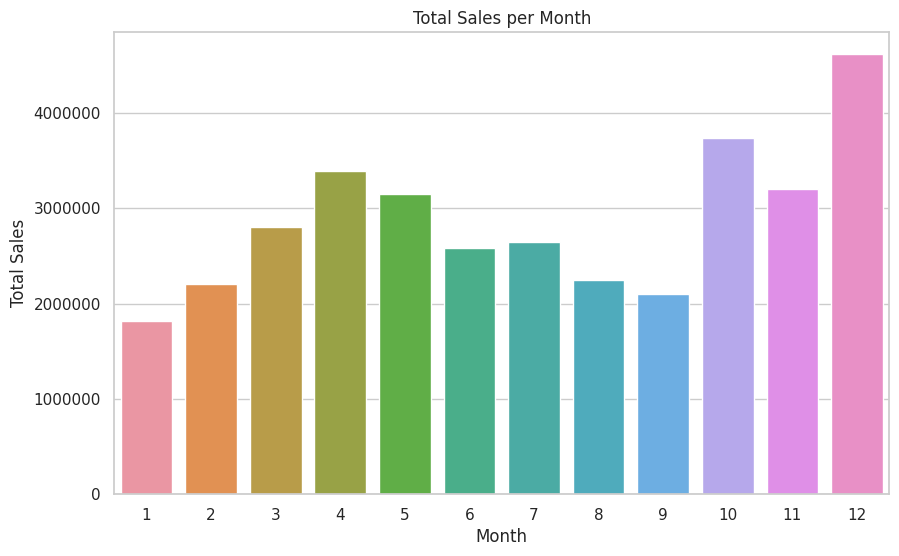

In [0]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')
sns.set_theme(style='whitegrid')
sns.barplot(x="Month", y="TotalSales", data=pd_sales_q1).set_title("Total Sales per Month")
plt.ylabel("Total Sales")
plt.show()

### Q2: Which city actually sold the most products?

In [0]:
sales2019_df.show(10)

+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
|OrderID|             Product|Quantity| Price|          OrderDate|        StoreAddress|          City|State|Month|
+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
| 295665|  Macbook Pro Laptop|       1|1700.0|2019-12-30 00:01:00|136 Church St, Ne...| New York City|   NY|   12|
| 295666|  LG Washing Machine|       1| 600.0|2019-12-29 07:03:00|562 2nd St, New Y...| New York City|   NY|   12|
| 295667|USB-C Charging Cable|       1| 11.95|2019-12-12 18:21:00|277 Main St, New ...| New York City|   NY|   12|
| 295668|    27in FHD Monitor|       1|149.99|2019-12-22 15:13:00|410 6th St, San F...| San Francisco|   CA|   12|
| 295669|USB-C Charging Cable|       1| 11.95|2019-12-18 12:38:00|43 Hill St, Atlan...|       Atlanta|   GA|   12|
| 295670|AA Batteries (4-p...|       1|  3.84|2019-12-31 22:58:00|200 Jefferson 

In [0]:
sales2019_df.select("OrderID", "Quantity", "City").show()

+-------+--------+--------------+
|OrderID|Quantity|          City|
+-------+--------+--------------+
| 295665|       1| New York City|
| 295666|       1| New York City|
| 295667|       1| New York City|
| 295668|       1| San Francisco|
| 295669|       1|       Atlanta|
| 295670|       1| New York City|
| 295671|       1|      Portland|
| 295672|       2|        Dallas|
| 295673|       1|        Dallas|
| 295674|       4|        Dallas|
| 295675|       2| San Francisco|
| 295676|       1|   Los Angeles|
| 295677|       2|        Boston|
| 295678|       2|        Dallas|
| 295679|       1|        Dallas|
| 295680|       1|        Austin|
| 295681|       1|        Boston|
| 295681|       1|        Boston|
| 295681|       1|        Boston|
| 295681|       1|        Boston|
+-------+--------+--------------+
only showing top 20 rows



In [0]:
sales_q2_df = (sales2019_df.groupby("City")
               .agg(sum("Quantity").alias("TotalProducts"))
               .orderBy("TotalProducts", ascending=False))

In [0]:
pd_sales_q2 = sales_q2_df.toPandas()

In [0]:
pd_sales_q2

,City,TotalProducts
0,San Francisco,50226
1,Los Angeles,33288
2,New York City,27916
3,Boston,22524
4,Dallas,16728
5,Atlanta,16602
6,Seattle,16552
7,Portland,14051
8,Austin,11151


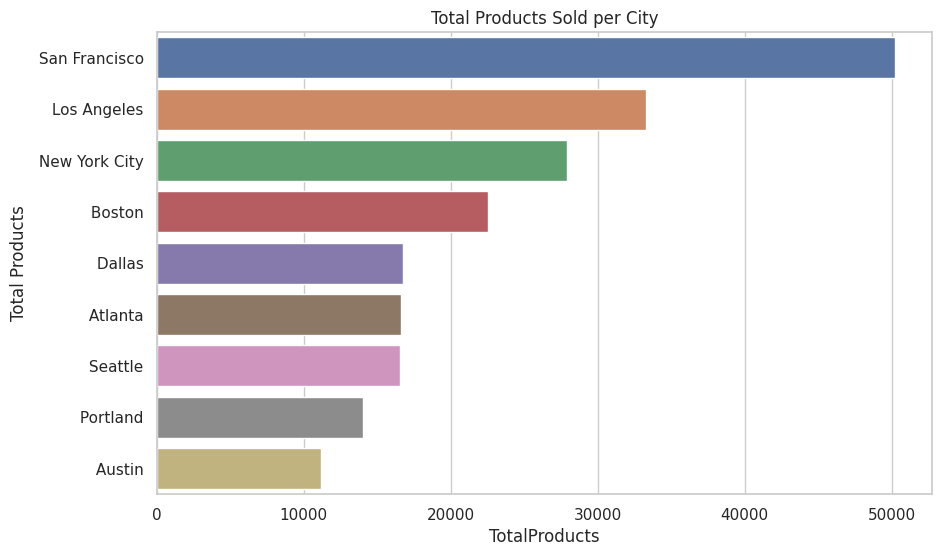

In [0]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')
sns.set_theme(style='whitegrid')
sns.barplot(x="TotalProducts", y="City", data=pd_sales_q2).set_title("Total Products Sold per City")
plt.ylabel("Total Products")
plt.show()

### Q3: What time should we display advertisements to maximize the likelihood of customers buying products?

In [0]:
from pyspark.sql.functions import count, date_format

In [0]:
sales2019_df.groupby("OrderID").agg(count("OrderID").alias('count')).where(col("count") > 1).show(10, False)

+-------+-----+
|OrderID|count|
+-------+-----+
|300601 |2    |
|304276 |2    |
|310188 |2    |
|261569 |2    |
|265863 |2    |
|269251 |2    |
|276515 |2    |
|277349 |2    |
|193640 |2    |
|284489 |2    |
+-------+-----+
only showing top 10 rows



In [0]:
sales2019_df.filter(col("OrderID") == 304276).show(truncate=False)

+-------+---------------+--------+------+-------------------+-----------------------------------+--------------+-----+-----+
|OrderID|Product        |Quantity|Price |OrderDate          |StoreAddress                       |City          |State|Month|
+-------+---------------+--------+------+-------------------+-----------------------------------+--------------+-----+-----+
|304276 |ThinkPad Laptop|1       |999.99|2019-12-15 06:07:00|358 5th St, New York City, NY 10001| New York City|NY   |12   |
|304276 |iPhone         |1       |700.0 |2019-12-15 06:07:00|358 5th St, New York City, NY 10001| New York City|NY   |12   |
+-------+---------------+--------+------+-------------------+-----------------------------------+--------------+-----+-----+



In [0]:
sales_q3_df = (sales2019_df.select("OrderID", date_format("OrderDate", "HH").cast('int').alias("Hour"))
                            .distinct()
                            .groupBy("Hour")
                            .agg(count("Hour").alias("TotalOrders"))
                            .orderBy(col("TotalOrders"), ascending=False))

In [0]:
pd_sales_q3 = sales_q3_df.toPandas()

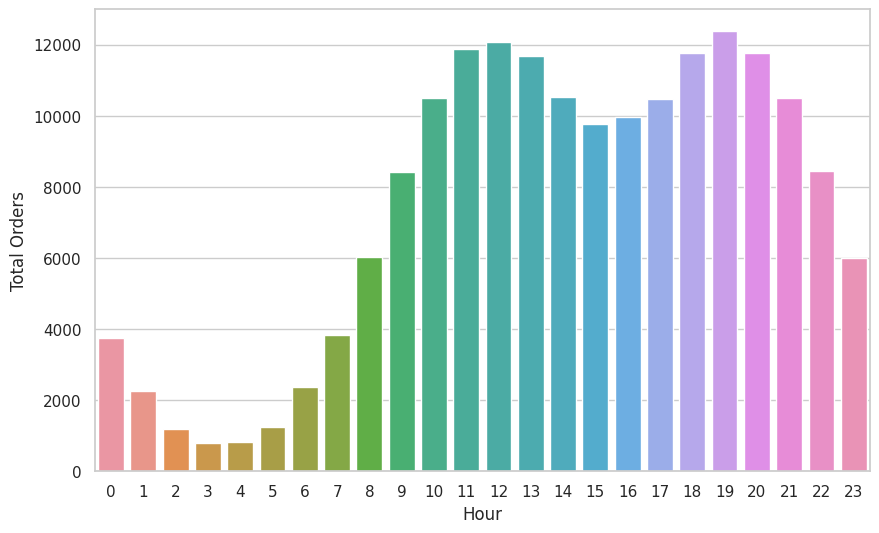

In [0]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')
sns.set_theme(style='whitegrid')
sns.barplot(x="Hour", y="TotalOrders", data=pd_sales_q3)
plt.ylabel("Total Orders")
plt.show()

### Q4. What products are most often sold together in the state of NY?

In [0]:
from pyspark.sql.functions import collect_list, size

In [0]:
sales_q4_df = (sales2019_df.where(col("State") == 'NY').orderBy("OrderID","Product")
                            .groupBy("OrderID", "State")
                            .agg(collect_list("Product").alias("ProductList")))

In [0]:
sales_q4_df.show(10, False)

+-------+-----+----------------------------+
|OrderID|State|ProductList                 |
+-------+-----+----------------------------+
|141264 |NY   |[Apple Airpods Headphones]  |
|141268 |NY   |[AA Batteries (4-pack)]     |
|141272 |NY   |[AAA Batteries (4-pack)]    |
|141278 |NY   |[Lightning Charging Cable]  |
|141282 |NY   |[Vareebadd Phone]           |
|141301 |NY   |[Apple Airpods Headphones]  |
|141314 |NY   |[Macbook Pro Laptop]        |
|141317 |NY   |[27in FHD Monitor]          |
|141323 |NY   |[USB-C Charging Cable]      |
|141343 |NY   |[Bose SoundSport Headphones]|
+-------+-----+----------------------------+
only showing top 10 rows



In [0]:
sales_q4_df = (sales_q4_df.withColumn("ProductListSize", size("ProductList")))
sales_q4_df.filter(col("ProductListSize") > 1).orderBy("ProductList").show(10, False)

+-------+-----+----------------------------------------+---------------+
|OrderID|State|ProductList                             |ProductListSize|
+-------+-----+----------------------------------------+---------------+
|253929 |NY   |[20in Monitor, 27in 4K Gaming Monitor]  |2              |
|158102 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|197004 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|248053 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|266247 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|176251 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|194762 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|245465 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|234956 |NY   |[20in Monitor, Apple Airpods Headphones]|2              |
|204645 |NY   |[20in Monitor, Apple Airpods Headphones]|2              |
+-------+-----+------------------------------------

In [0]:
(sales_q4_df.filter(col("ProductListSize") > 1)
            .groupby("ProductList")
            .count()
            .orderBy("count", ascending= False)).show(10, False)

+-------------------------------------------------+-----+
|ProductList                                      |count|
+-------------------------------------------------+-----+
|[Google Phone, USB-C Charging Cable]             |127  |
|[Lightning Charging Cable, iPhone]               |126  |
|[Google Phone, Wired Headphones]                 |53   |
|[USB-C Charging Cable, Vareebadd Phone]          |50   |
|[Wired Headphones, iPhone]                       |46   |
|[Apple Airpods Headphones, iPhone]               |45   |
|[Bose SoundSport Headphones, Google Phone]       |24   |
|[Apple Airpods Headphones, Wired Headphones]     |19   |
|[Vareebadd Phone, Wired Headphones]              |17   |
|[AA Batteries (4-pack), Lightning Charging Cable]|16   |
+-------------------------------------------------+-----+
only showing top 10 rows

